In [3]:
pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 174.1/626.3 kB 2.6 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/626.3 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.9 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

In [2]:
df=pd.read_csv('twitter_training.csv')

In [3]:
def preprocess_tweet(tweet):
    cleaned_tweet = re.sub(r"http\S+|@\S+|[^A-Za-z0-9]+", " ", tweet)
    return cleaned_tweet

In [5]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df['cleaned_tweet'] = df['Borderlands'].apply(preprocess_tweet)

In [7]:
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity


In [8]:
df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

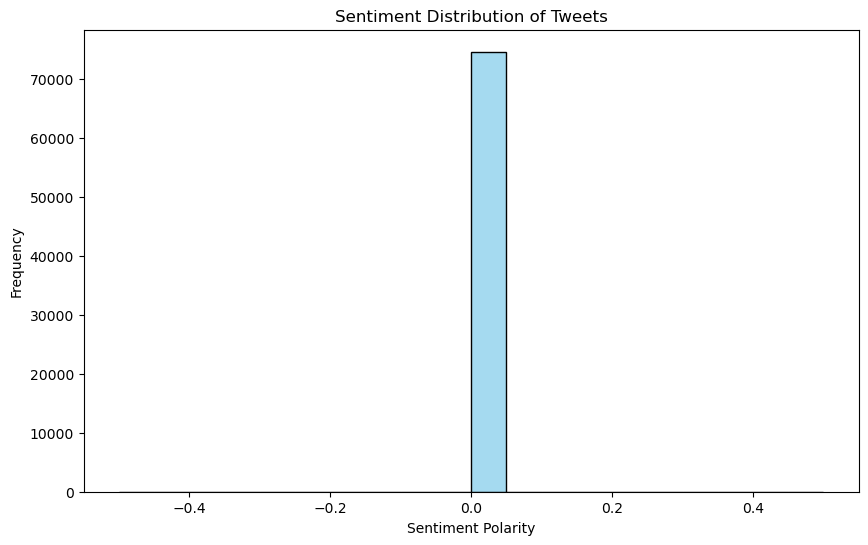

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='sentiment', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of Tweets')
plt.show()